In [1]:
from pyaxidraw import axidraw   # import module
from tqdm import tqdm

import matplotlib.pyplot as plt

import sys
from scipy.integrate import odeint
import numpy as np
from sklearn.preprocessing import minmax_scale

In [3]:
ad = axidraw.AxiDraw()          # Initialize class
ad.interactive()                # Enter interactive context
ad.options.pen_pos_up = 60      # set pen-up position

ad.connect()                    # Open serial port to AxiDraw

ad.options.pen_rate_raise = 90

ad.options.pen_rate_lower = 75
ad.options.pen_pos_down = 30 
ad.bounds = [[0.,0.],[11,8.5]]

ad.options.speed_penup = 75

Failed to connect to AxiDraw.


In [157]:
x_start = 1
x_end = 10
x_spacing = 0.05
y_start = 1
y_end = 7
y_spacing = 0.05
xcoords = np.arange(x_start,x_end,x_spacing)
ycoords = np.arange(y_start,y_end,y_spacing)

In [111]:
xc,yc = np.meshgrid(xcoords,ycoords)

In [113]:
probs = minmax_scale(xc,axis=1)

choices = np.random.binomial(n=1,p=probs)

In [114]:
xf = xc.flatten()
yf = yc.flatten()
pf = probs.flatten()
cf = choices.flatten()

In [115]:
red_ind = cf==1
blue_ind = cf==0

(0, 8.5)

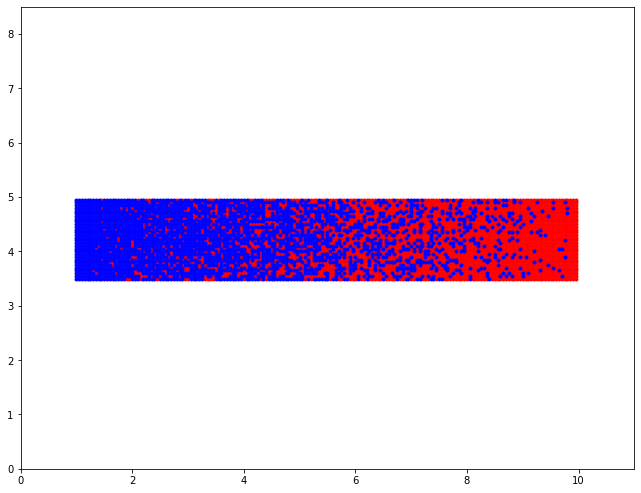

In [116]:
f,ax = plt.subplots(figsize=(11,8.5))
ax.plot(xf[red_ind], yf[red_ind],'.r')
ax.plot(xf[blue_ind], yf[blue_ind],'.b')
ax.set_xlim((0,11))
ax.set_ylim((0,8.5))

In [69]:
ad.penup()

In [117]:
red_points = [(x,y) for x,y in zip(xf[red_ind], yf[red_ind])]

In [118]:
blue_points = [(x,y) for x,y in zip(xf[blue_ind], yf[blue_ind])]

In [119]:
for xy in tqdm(red_points):
    _x,_y = xy
    ad.moveto(round(_x,4),round(_y,4))
    ad.pendown()
    ad.penup()
ad.moveto(0.,0.)

100%|██████████| 2652/2652 [17:25<00:00,  2.82it/s]


In [120]:
for xy in tqdm(blue_points):
    _x,_y = xy
    ad.moveto(round(_x,4),round(_y,4))
    ad.pendown()
    ad.penup()
ad.moveto(0.,0.)

100%|██████████| 2748/2748 [18:03<00:00,  2.43it/s]


In [174]:
#now random lines
n_lines = 2000
x_coords = np.sort(np.random.random(n_lines))
y_coords = np.random.random((n_lines,2))
choices = np.random.binomial(n=1,p=x_coords)

choices = np.random.binomial(n=1,p=x_coords)

red_ind = choices==1
blue_ind = choices==0

scaled_x_coords = (x_coords ) * (x_end - x_start) + x_start
scaled_y_coords = (y_coords ) * (y_end - y_start) + y_start

cps = [((x,y[0]),(x,y[1])) for x,y in zip(scaled_x_coords, scaled_y_coords)]

red_cps = []
blue_cps = []
for i, is_red in enumerate(red_ind):
    if is_red:
        red_cps.append(cps[i])
    else:
        blue_cps.append(cps[i])

(0, 8.5)

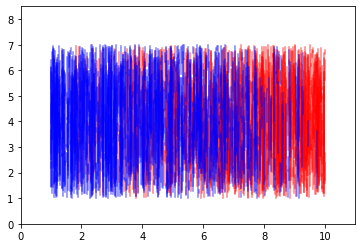

In [175]:
f,ax = plt.subplots()
for red_cp in red_cps:
    cp1,cp2 = red_cp
    ax.plot([cp1[0],cp2[0]],[cp1[1],cp2[1]],'r',alpha = 0.5)
    
for blue_cp in blue_cps:
    cp1,cp2 = blue_cp
    ax.plot([cp1[0],cp2[0]],[cp1[1],cp2[1]],'b',alpha = 0.5)
    
ax.set_xlim((0,11))
ax.set_ylim((0,8.5))

In [176]:
for cp in tqdm(blue_cps):
    cp1,cp2 = cp
    x1,y1 = cp1
    x2,y2 = cp2
    ad.moveto(round(x1,4),round(y1,4))
    ad.lineto(round(x2,4),round(y2,4))
    ad.penup()
ad.moveto(0.,0.)

100%|██████████| 1019/1019 [30:29<00:00,  1.85s/it]


In [177]:
for cp in tqdm(red_cps):
    cp1,cp2 = cp
    x1,y1 = cp1
    x2,y2 = cp2
    ad.moveto(round(x1,4),round(y1,4))
    ad.lineto(round(x2,4),round(y2,4))
    ad.penup()
ad.moveto(0.,0.)

 50%|█████     | 494/981 [14:52<17:03,  2.10s/it]
USB connection to AxiDraw lost.
100%|██████████| 981/981 [14:52<00:00,  1.10it/s]


In [214]:
#now evenly spaced random lines
x_start = 1
x_end = 10
x_spacing = 0.02
y_start = 1
y_end = 7

x_coords = np.arange(x_start, x_end, x_spacing)
min_y_length = 0.8
max_y_length = 1
y_center = 4.25
y_lengths = np.random.random(len(x_coords))*(max_y_length-min_y_length) + min_y_length

y_coords = np.zeros((len(x_coords),2))

y_coords[:,0] = y_center - y_lengths
y_coords[:,1] = y_center + y_lengths



probs = minmax_scale(x_coords)

choices = np.random.binomial(n=1,p=probs)

red_ind = choices==1
blue_ind = choices==0


cps = [((x,y[0]),(x,y[1])) for x,y in zip(x_coords, y_coords)]

red_cps = []
blue_cps = []
for i, is_red in enumerate(red_ind):
    if is_red:
        red_cps.append(cps[i])
    else:
        blue_cps.append(cps[i])

(0, 8.5)

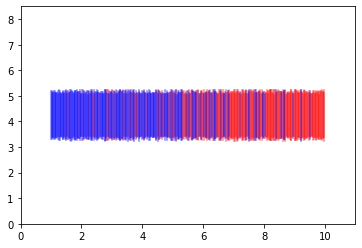

In [215]:
f,ax = plt.subplots()
for red_cp in red_cps:
    cp1,cp2 = red_cp
    ax.plot([cp1[0],cp2[0]],[cp1[1],cp2[1]],'r',alpha = 0.5)
    
for blue_cp in blue_cps:
    cp1,cp2 = blue_cp
    ax.plot([cp1[0],cp2[0]],[cp1[1],cp2[1]],'b',alpha = 0.5)
    
ax.set_xlim((0,11))
ax.set_ylim((0,8.5))

In [217]:
ad.options.speed_pendown = 10
ad.options.pen_pos_down = 10

In [219]:
for cp in tqdm(blue_cps):
    cp1,cp2 = cp
    x1,y1 = cp1
    x2,y2 = cp2
    ad.moveto(round(x1,4),round(y1,4))
    ad.lineto(round(x2,4),round(y2,4))
    ad.penup()
ad.moveto(0.,0.)

100%|██████████| 214/214 [06:28<00:00,  1.87s/it]


In [218]:
for cp in tqdm(red_cps):
    cp1,cp2 = cp
    x1,y1 = cp1
    x2,y2 = cp2
    ad.moveto(round(x1,4),round(y1,4))
    ad.lineto(round(x2,4),round(y2,4))
    ad.penup()
ad.moveto(0.,0.)

100%|██████████| 236/236 [07:09<00:00,  1.84s/it]


In [316]:
theta_range = np.linspace(0,2.01*np.pi,360)

In [2]:

def make_circle(r, center, theta_range):
    x_coords = np.cos(theta_range)*r + center[0]
    y_coords = np.sin(theta_range)*r + center[1]
    return np.stack([x_coords, y_coords]).T.round(4)

def make_circle_set(r_range, center, theta_range):
    cp_sets = []
    for r in r_range:
        _cps = make_circle(r, center, theta_range)
        cp_sets.append(_cps)
    return cp_sets

(0.8, 10.2, 0.8, 7.7)

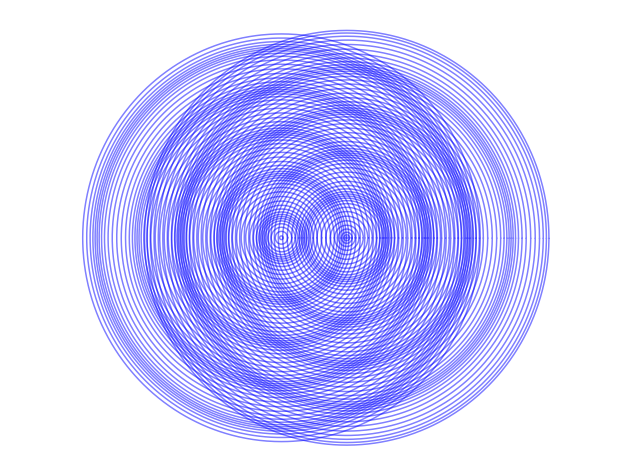

In [75]:

cp_sets = []
radius_mod_freq = 10
radius_mod_amp = 0.04
radius_mod_phase = 0
inner_r = 0.02
outer_r = 3.1
base_r_spacing = 0.05
r_range_base = np.arange(inner_r, outer_r, base_r_spacing)
r_range = r_range_base + (np.sin((r_range_base+radius_mod_phase)*radius_mod_freq))*radius_mod_amp
center = (5.,4.25)
cp_sets = make_circle_set(r_range, center, theta_range)
    
radius_mod_freq = 10
radius_mod_amp = 0.04
radius_mod_phase = 1/2*np.pi
# radius_mod_phase = 0
r_range_base = np.arange(inner_r, outer_r, base_r_spacing)
r_range = r_range_base + (np.sin((r_range_base+radius_mod_phase)*radius_mod_freq))*radius_mod_amp
# r_range = r_range_base
center = (6.,4.25)
cp_sets += make_circle_set(r_range, center, theta_range)
    
f,ax = plt.subplots(figsize=(11,8.5))
for cp_set in cp_sets:
    ax.plot(cp_set[:,0],cp_set[:,1],'b', alpha=0.5)
    ax.set_xlim((0.8,10.2))
    ax.set_ylim((0.8,7.7))
ax.axis('off')

In [402]:
f.savefig('/Users/naka/Pictures/axidraw/moire_radius_mod_anti_phase3.svg')

In [291]:
ad.options.speed_pendown = 80
ad.options.pen_pos_down = 10

In [292]:
try:
    for cp_set in tqdm(cp_sets):
        ad.moveto(cp_set[0,0],cp_set[0,1])
        for i in range(len(cp_set)):
            x = cp_set[i,0]
            y = cp_set[i,1]
            ad.lineto(x,y)
        ad.penup()
except:
    ad.moveto(0.,0.)
ad.moveto(0.,0.)

100%|██████████| 154/154 [1:28:33<00:00, 46.19s/it]


In [3]:
def make_radial_line(r_inner, r_outer, center, theta):
    r = np.array([r_inner, r_outer])
    x_coords = np.cos(theta)*r + center[0]
    y_coords = np.sin(theta)*r + center[1]
    return np.stack([x_coords, y_coords]).T.round(4)

def make_radial_line_set(r_inner, r_outer, center, theta_range):
    rl_sets = []
    for theta in theta_range:
        _rl = make_radial_line(r_inner, r_outer, center, theta)
        rl_sets.append(_rl)
    return rl_sets

array([5.25, 4.25])

(0.8, 10.2, 0.8, 7.7)

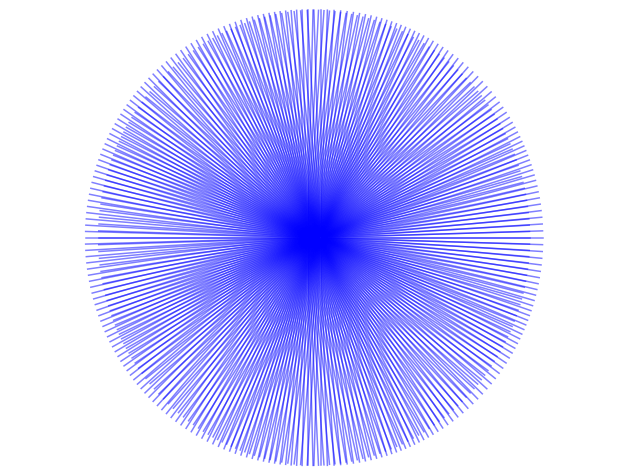

In [55]:
paper_center = np.array([5.5,4.25])
r_inner = 0.02
r_outer = 3.4

theta_mod_freq = 6
theta_mod_amp = 0.01
theta_mod_phase = 0
theta_spacing = np.pi/120
theta_range_base = np.arange(0,2*np.pi,theta_spacing)
theta_range = theta_range_base + (np.sin((theta_range_base+theta_mod_phase)*theta_mod_freq))*theta_mod_amp


center = paper_center + np.array([-0.1,0])
rl_sets = make_radial_line_set(r_inner, r_outer, center, theta_range)

theta_mod_freq = 8
theta_mod_amp = 0.02
theta_mod_phase = np.pi*0.0
theta_range_base = np.arange(0,2*np.pi,theta_spacing)
theta_range = theta_range_base + (np.sin((theta_range_base+theta_mod_phase)*theta_mod_freq))*theta_mod_amp

center = paper_center + np.array([0.1,0])
rl_sets += make_radial_line_set(r_inner, r_outer, center, theta_range)



f,ax = plt.subplots(figsize=(11,8.5))
for rl_set in rl_sets:
    ax.plot(rl_set[:,0],rl_set[:,1],'b', alpha=0.5)
    ax.set_xlim((0.8,10.2))
    ax.set_ylim((0.8,7.7))
ax.axis('off')

In [56]:
f.savefig('/Users/naka/Pictures/axidraw/moire_radial_lines4.svg')

In [94]:
def make_spiral(r_range, center, theta_range):
    x_coords = np.cos(theta_range)*r_range + center[0]
    y_coords = np.sin(theta_range)*r_range + center[1]
    return np.stack([x_coords, y_coords]).T.round(4)

(0.8, 10.2, 0.8, 7.7)

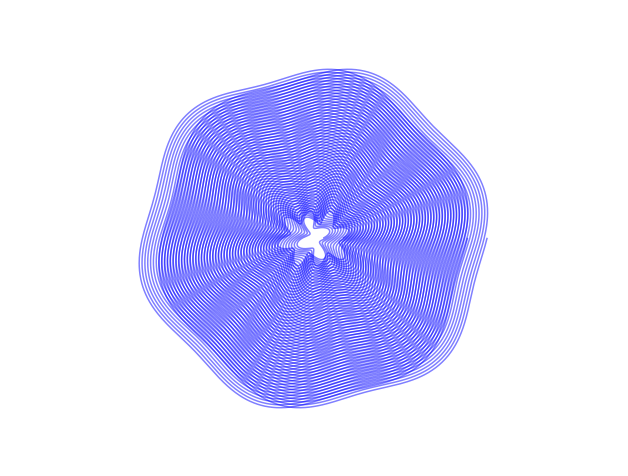

In [177]:
rl_sets = []
r_inner = 0.3
r_outer = 2.5
theta_spacing = np.pi/720
theta_start = 0 * np.pi
theta_end = 100 * np.pi
theta_range = np.arange(theta_start,theta_end,theta_spacing)

r_mod_freq = 6
r_mod_amp = 0.1
r_mod_phase = 0
r_range_base = np.linspace(r_inner,r_outer,len(theta_range))

r_range = r_range_base + (np.sin((theta_range+r_mod_phase)*r_mod_freq))*r_mod_amp
center = paper_center + np.array([-0.15,0])

rl_sets.append(make_spiral(r_range, center, theta_range))

r_mod_freq = 6
r_mod_amp = 0.1
r_mod_phase = np.pi*0.0
r_range_base = np.linspace(r_inner,r_outer,len(theta_range))
r_range = r_range_base + (np.sin((theta_range+r_mod_phase)*r_mod_freq))*r_mod_amp
center = paper_center + np.array([0.15,0])
rl_sets.append(make_spiral(r_range, center, theta_range))

f,ax = plt.subplots(figsize=(11,8.5))
for rl_set in rl_sets:
    ax.plot(rl_set[:,0],rl_set[:,1],'b', alpha=0.5)
    ax.set_xlim((0.8,10.2))
    ax.set_ylim((0.8,7.7))
ax.axis('off')

In [178]:
f.savefig('/Users/naka/Pictures/axidraw/moire_spiral.svg')